## 복습
- 이전에 풀었던 코드를 기반으로 성능이나 가독성을 높이거나, 성능 등이 떨어지더라도 다른 방법으로 풀어보기

### [체육복](https://school.programmers.co.kr/learn/courses/30/lessons/42862)

- 기존 코드

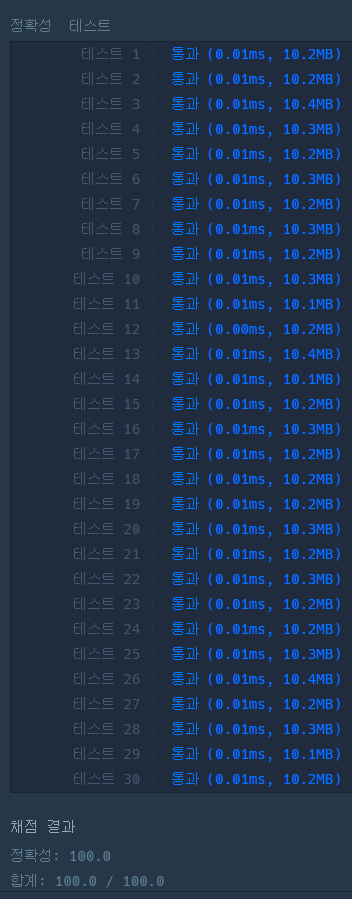

In [ ]:
def solution(n, lost, reserve):
    # 여벌 체육복을 가진 학생이 도난당한 경우를 제거
    reserve_set = set(reserve) - set(lost)
    lost_set = set(lost) - set(reserve)

    answer = n - len(lost_set)  # 처음에는 모든 학생이 수업을 들을 수 있다고 가정

    for student in sorted(lost_set):
        # 바로 앞 번호 학생에게 체육복을 빌릴 수 있는지 확인
        if student - 1 in reserve_set:
            reserve_set.remove(student - 1)
            answer += 1
        # 바로 뒷 번호 학생에게 체육복을 빌릴 수 있는지 확인
        elif student + 1 in reserve_set:
            reserve_set.remove(student + 1)
            answer += 1

    return answer


- 새로 작성한 코드  
: 속도는 비슷하거나 살짝 느리지만, 메모리 측면에서의 소소한 이점이 있음  
: 배열을 이용한 풀이 방식으로 조회수를 조금 줄일 수 있지 않을까해서 처리

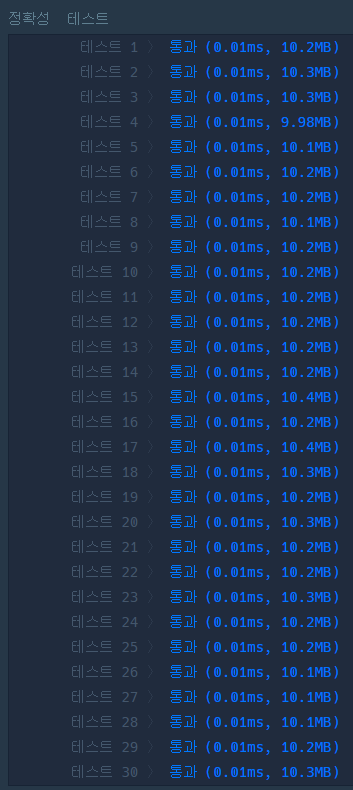

In [ ]:
def solution(n, lost, reserve):
    clothes = [1] * (n + 1)
    
    for l in lost:
        clothes[l] -= 1

    for r in reserve:
        clothes[r] += 1

    for i in range(1, n + 1):
        if clothes[i] == 0:
            if i > 1 and clothes[i - 1] == 2:
                clothes[i - 1] -= 1
                clothes[i] += 1
            elif i < n and clothes[i + 1] == 2:
                clothes[i + 1] -= 1
                clothes[i] += 1

    return sum(1 for c in clothes[1:] if c >= 1)

In [11]:
n, lost, reserve = 5, [2, 4], [1, 3, 5]
solution(n, lost, reserve)

5

### [바탕화면 정리](https://school.programmers.co.kr/learn/courses/30/lessons/161990)

- 기존 코드 : 가독성은 좋으나 조건문 추가로 성능 향상이 가능

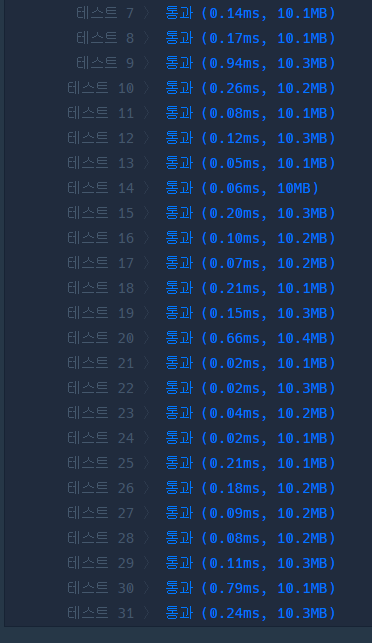

In [ ]:
def solution(wallpaper):
    codes = []
    for idx, wall in enumerate(wallpaper) :
        code = [(idx, x_idx) for x_idx, x in enumerate(wall) if x == '#']
        codes += code
        
    x_min = min(codes, key=lambda x: x[0])[0]
    x_max = max(codes, key=lambda x: x[0])[0]
    y_min = min(codes, key=lambda x: x[1])[1]
    y_max = max(codes, key=lambda x: x[1])[1]
    return [x_min, y_min, x_max+1, y_max+1]

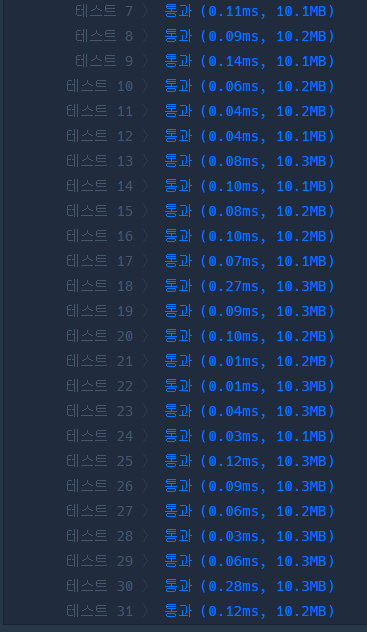

In [ ]:
def solution(wallpaper):    
    y_min = len(wallpaper)
    y_max = 0
    x_min = len(wallpaper[0])
    x_max = 0
    for y_idx, wall in enumerate(wallpaper):
        target = [(x_idx, x) for x_idx, x in enumerate(wall) if x == '#']
        if target:
            y_min = min(y_idx, y_min)
            y_max = max(y_idx, y_max)
            x_min = min(target[0][0], x_min)
            x_max = max(target[-1][0], x_max)
    return [y_min, x_min, y_max+1, x_max+1]

### [신규 아이디 추천](https://school.programmers.co.kr/learn/courses/30/lessons/72410)

- 기존 코드 : 가독성이 떨어지므로, 이를 개선

In [1]:
import re

def solution(new_id):
    
    new_id = new_id.lower()
    new_id = re.sub(r'[^0-9a-z\-_.]','', new_id)
    new_id = re.sub(re.compile("\.+"),".", new_id)
    if len(new_id) >= 1 :
        if new_id[0] == "." :
            new_id = new_id[1:]
    else :
        return "aaa"
    if len(new_id) >= 1 :
        if new_id[-1] == ".":
            new_id = new_id[:-1]
    else :
        return "aaa"
    
    if len(new_id) > 15 :
        if new_id[14] == "." :
            new_id = new_id[:14]
            while new_id[-1] == "." :
                new_id = new_id[:-1]
            return new_id
        
        else :
            return new_id[:15]
    elif len(new_id) < 3 :
        while len(new_id) < 3 :
            if (new_id[0] == ".") :
                new_id = new_id[1:]
            if (new_id[-1] == ".") :
                new_id = new_id[:-1]
                
            if len(new_id) < 1 :
                return "aaa"
            else :
                new_id += new_id[-1]
                
        return new_id
    else :
        return new_id

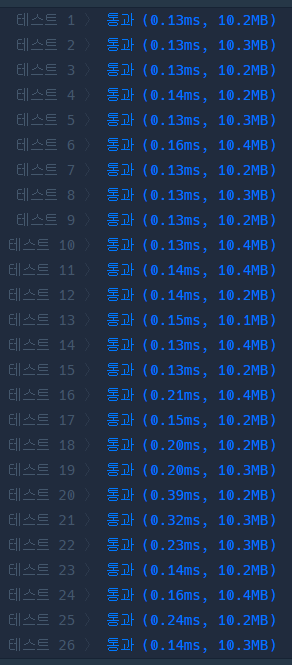

In [ ]:
import re

def remove_first_dot(string):
    if not string:
        return 'a'
    elif string[0] == '.':
        string = string[1:]
    return string

def remove_last_dot(string):
    if not string:
        return 'a'
    elif string[-1] == '.':
        string = string[:-1]
    return string

def solution(new_id):
    
    new_id = new_id.lower()
    new_id = re.sub(r'[^0-9a-z\-_.]','', new_id)
    new_id = re.sub(re.compile("\.+"),".", new_id)
    
    while True:
        new_id = new_id.replace('..', '.')        
        new_id = remove_first_dot(new_id)
        new_id = remove_last_dot(new_id)        
            
        length = len(new_id)
        if length >= 16:
            new_id = remove_last_dot(new_id[:15])
        elif length <= 2:
            extra = 3 - length
            last_w = new_id[-1]
            new_id += extra * last_w
        else:
            return new_id
            